In [1]:
import torch
from torch import embedding, nn
import torch.nn.functional as F
import torch.optim as optim
import random
import time
from tqdm import tqdm
from unet import UNet
from baseline import FaceRecognizer
from preprocessing import *
# train_data: tuple of length 320, each is a matrix represents a picture
# train_target: tuple of length 320, each is a label
# For training, there are 40 classes, each has 7 pictures
# For testing, there are 40 classes, each has 3 pictures

/home/jupyter-zhw622/DeepLearning/preprocessing.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  train_data = torch.tensor(train_data)


In [2]:
fr = FaceRecognizer()
fr.load_state_dict(torch.load('model_1e-8_1e-4_1e-2_94.pt'))
# init generator
generator = UNet(n_channels=1, n_classes=40)

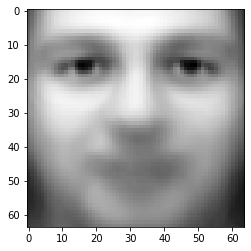

In [3]:
# average image for all data
avg_image = (torch.sum(train_data, axis=0)+torch.sum(test_data, axis=0))/400
tensor_to_picture(avg_image[0][0])

In [4]:
# Prediction of the avg_image
fr.forward(avg_image)

tensor([[-0.9636, -3.0208,  0.1205,  0.6626,  0.6558, -3.1727,  2.5054, -1.0432,
          2.9281,  2.5871, -0.6403,  3.6187,  0.6923, -1.8644, -1.1924,  1.6136,
          0.5985,  2.9521,  1.5514, -2.8302,  0.1080, -0.9466,  0.4378,  2.0038,
          2.4336, -2.5049,  0.7102, -0.4253, -0.6878, -0.8530, -1.4567,  0.2879,
         -0.1903, -3.8461,  0.1771, -1.5593, -3.0141,  1.6467, -0.7941,  1.6279]],
       grad_fn=<AddmmBackward0>)

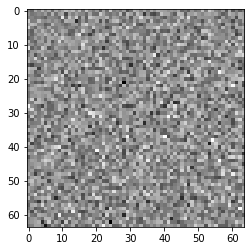

In [5]:
# show picture of noise
noise = torch.normal(0, 1, size=(1,1,64, 64))
tensor_to_picture(noise[0][0])
#torch.argmax(fr.forward(noise))

In [6]:
# predictions of the noise
preds = []
max_confidence = []
for _ in range(100):
    noise = torch.normal(0, 1, size=(1,1,64, 64))
    preds.append(torch.argmax(fr.forward(noise)).item())
    max_confidence.append(torch.max(fr.forward(noise)).item())

In [7]:
# the avg of maximum confidence
sum(max_confidence)/len(max_confidence)

4.536391618251801

In [8]:
from collections import Counter
Counter(preds)

Counter({33: 55, 30: 19, 21: 25, 38: 1})

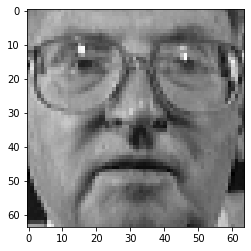

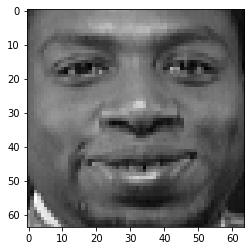

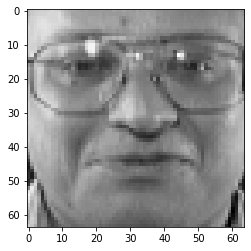

In [9]:
# result indicates that our nn is not very smart
# the privacy of this three dudes are well protect
    # if input noise, nn predict these dudes,
        # difficult for attacker to reconstruct them
label_to_picture(33)
label_to_picture(21)
label_to_picture(30)

In [10]:
x = generator.forward(avg_image)

In [11]:
x.shape

torch.Size([1, 40, 64, 64])

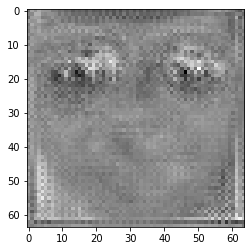

In [12]:
tensor_to_picture(x[0][3].detach().numpy())

In [13]:
# predictions of the generated images
preds = []
max_confidence = []
for i in range(40):
    generated = x[0][i].reshape(1,1,64,64)
    preds.append(torch.argmax(fr.forward(generated)).item())
    max_confidence.append(torch.max(fr.forward(generated)).item())

In [14]:
Counter(preds)

Counter({23: 14,
         5: 7,
         15: 3,
         30: 3,
         35: 1,
         33: 3,
         21: 2,
         4: 2,
         10: 1,
         19: 3,
         12: 1})

In [15]:
sum(max_confidence)/len(max_confidence)

3.8897314459085464

In [16]:
y = generator.forward(noise)

In [17]:
# predictions of the generated images
preds = []
max_confidence = []
for i in range(40):
    generated = y[0][i].reshape(1,1,64,64)
    preds.append(torch.argmax(fr.forward(generated)).item())
    max_confidence.append(torch.max(fr.forward(generated)).item())

In [18]:
Counter(preds)

Counter({33: 16, 5: 13, 12: 2, 21: 8, 30: 1})

In [19]:
sum(max_confidence)/len(max_confidence)

3.386365160346031